In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import scipy

In [53]:
dist_matrix = pd.read_csv("../results/pangenome_results/intra_individual/Bella/Bella_matrix.tsv", sep='\t', index_col="snp-dists 0.8.2")
dist_matrix.index.name = ""
# condensed_dist_matrix = scipy.spatial.distance.squareform(np.array(dist_matrix))

In [46]:
dist_matrix.shape

(7, 7)

In [56]:
condensed_dist_matrix

array([87, 30, 33, 29, 11, 27, 67, 68, 72, 84, 64, 27, 21, 29, 21, 24, 30,
       24, 26, 16, 24])

In [47]:
dist_matrix.describe()

,Bella1_1,Bella1_2,Bella1_3,Bella1_4,Bella1_5,Bella1_6,Bella1_7
count,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,31.00000,63.142857,27.857143,29.428571,26.857143,29.142857,25.142857
std,27.45299,29.180065,20.036871,20.131709,22.078863,26.535690,19.359998
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.00000,65.500000,21.000000,24.000000,18.500000,17.500000,18.500000
50%,29.00000,68.000000,27.000000,27.000000,24.000000,26.000000,24.000000
75%,31.50000,78.000000,29.500000,31.500000,27.500000,29.500000,25.500000
max,87.00000,87.000000,67.000000,68.000000,72.000000,84.000000,64.000000


In [48]:
dist_matrix

,Bella1_1,Bella1_2,Bella1_3,Bella1_4,Bella1_5,Bella1_6,Bella1_7
,,,,,,,
Bella1_1,0,87,30,33,29,11,27
Bella1_2,87,0,67,68,72,84,64
Bella1_3,30,67,0,27,21,29,21
Bella1_4,33,68,27,0,24,30,24
Bella1_5,29,72,21,24,0,26,16
Bella1_6,11,84,29,30,26,0,24
Bella1_7,27,64,21,24,16,24,0


## gene length distribution

In [61]:
sns.set_theme(style="whitegrid")
# sns.heatmap(dist_matrix, annot=True)

/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


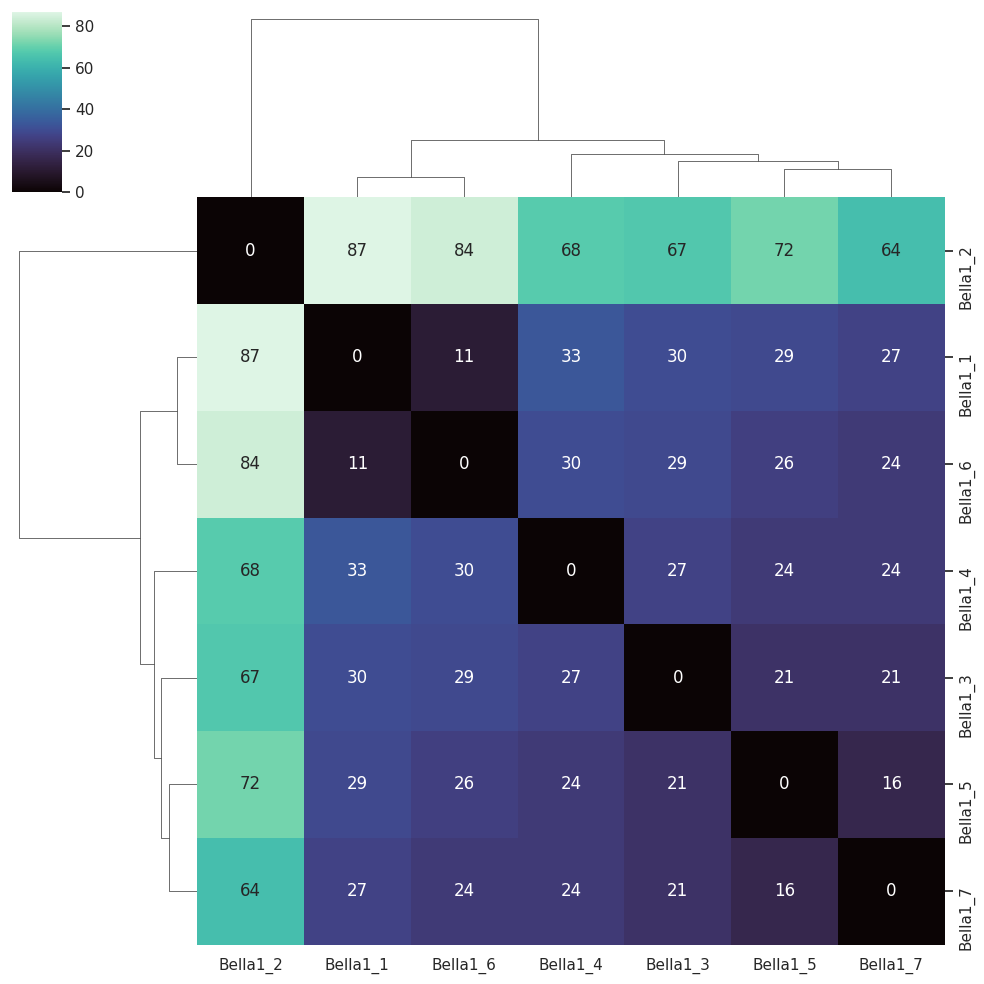

In [70]:
sns.clustermap(dist_matrix, annot=True, cmap="mako")

In [26]:
dist_matrix_molten = pd.read_csv("../results/pangenome_results/intra_individual/Bella/Bella_matrix_molten.tsv", sep='\t', names=["Sample1", "Sample2", "Distance"])

In [28]:
dist_matrix_molten.head()

,Sample1,Sample2,Distance
0,Bella1_1,Bella1_1,0
1,Bella1_1,Bella1_2,87
2,Bella1_1,Bella1_3,30
3,Bella1_1,Bella1_4,33
4,Bella1_1,Bella1_5,29


/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks

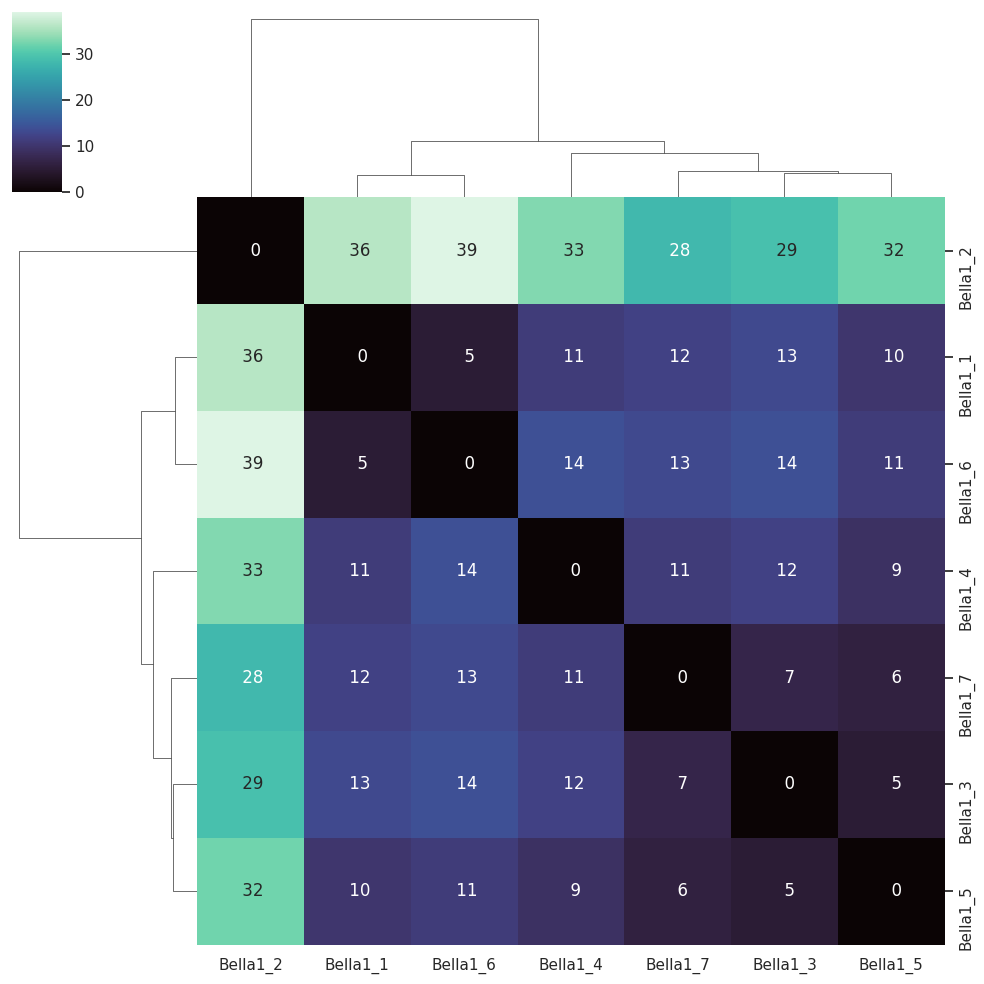

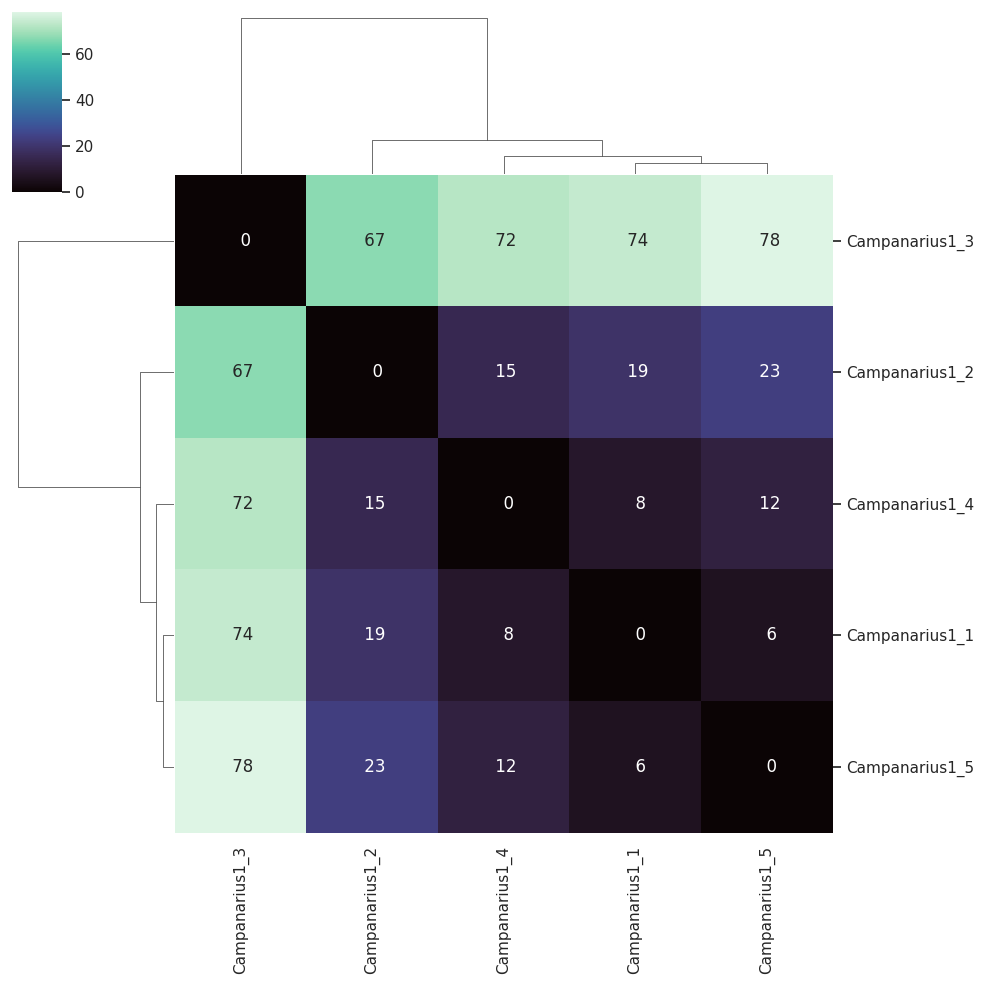

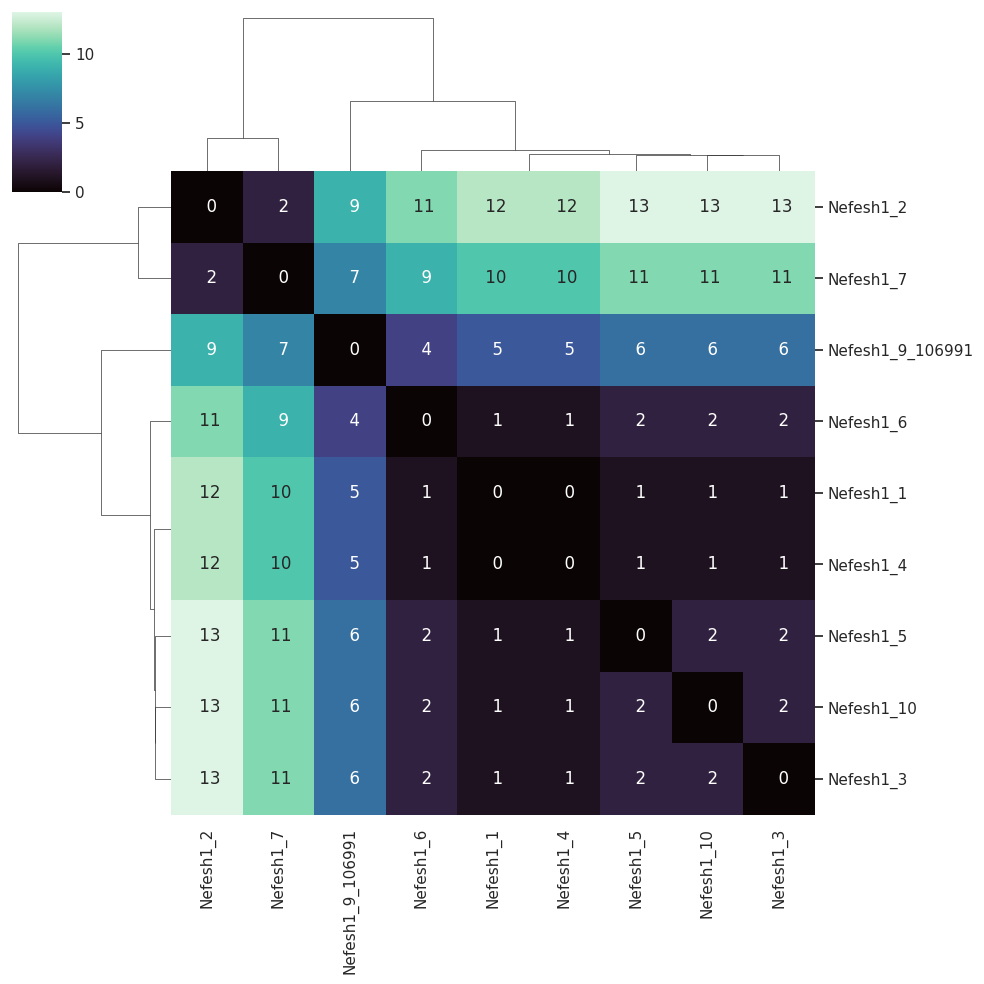

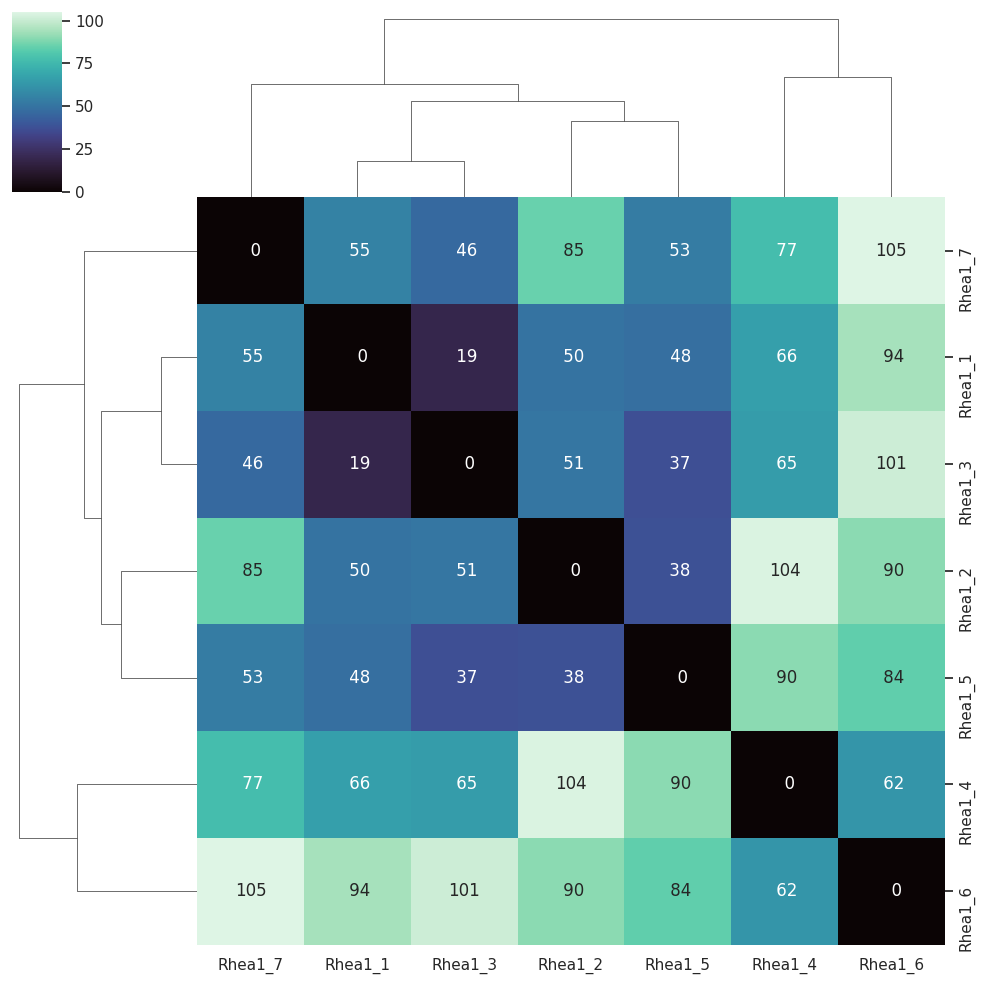

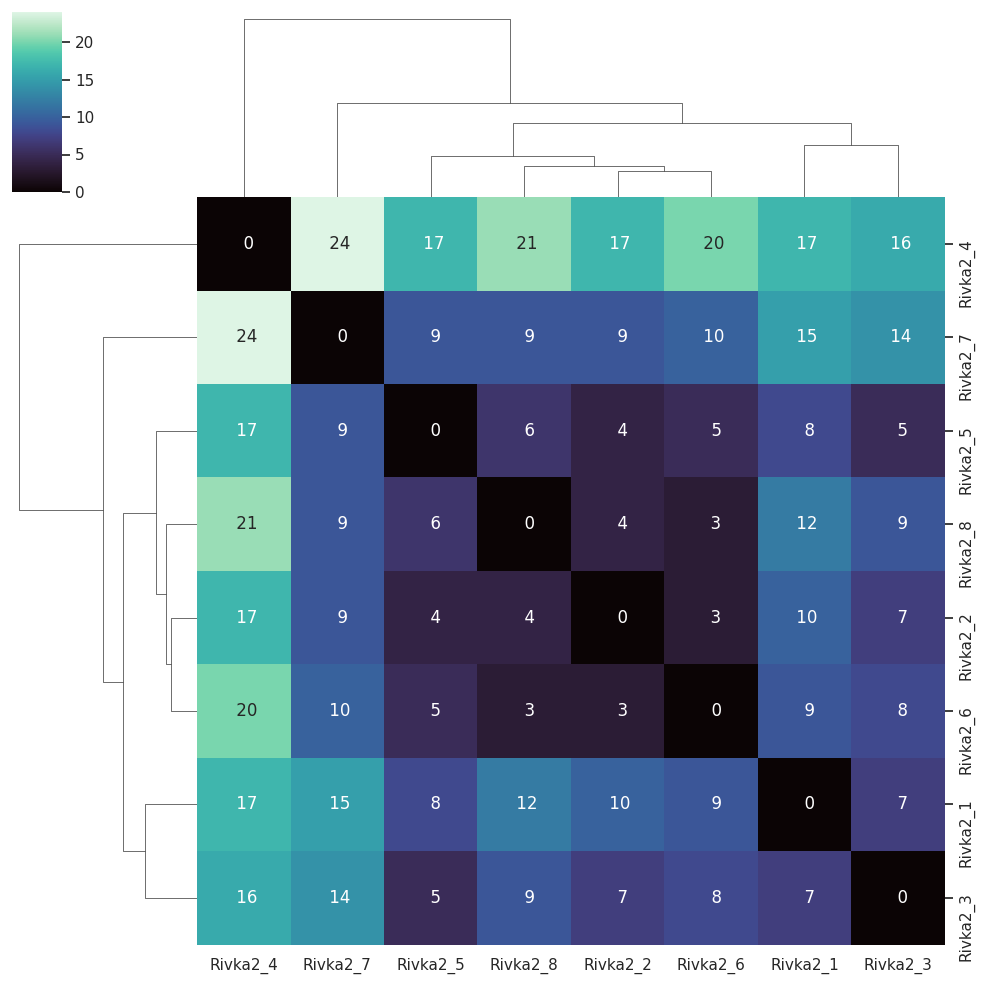

In [19]:
intra_individuals = ["Bella","Campanarius", "Nefesh", "Rhea", "Rivka"]
total_dist_matrix = pd.read_csv(f"../results/pangenome_results/stringent/test_phandago/total_dist_matrix_filtered_mge.tsv", sep='\t', index_col="snp-dists 0.8.2")
total_dist_matrix.index.name = ""

sns.set_theme(style="whitegrid")
                                
for indv in intra_individuals:
    dist_matrix = total_dist_matrix.filter(regex=f"{indv}*", axis='index').filter(regex=f"{indv}*", axis='columns')
    
    clustermap = sns.clustermap(dist_matrix, annot=True, cmap="mako", fmt="3")
    clustermap.savefig(f"../results/pangenome_results/intra_individual/figures/{indv}_clustermap.png")

/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


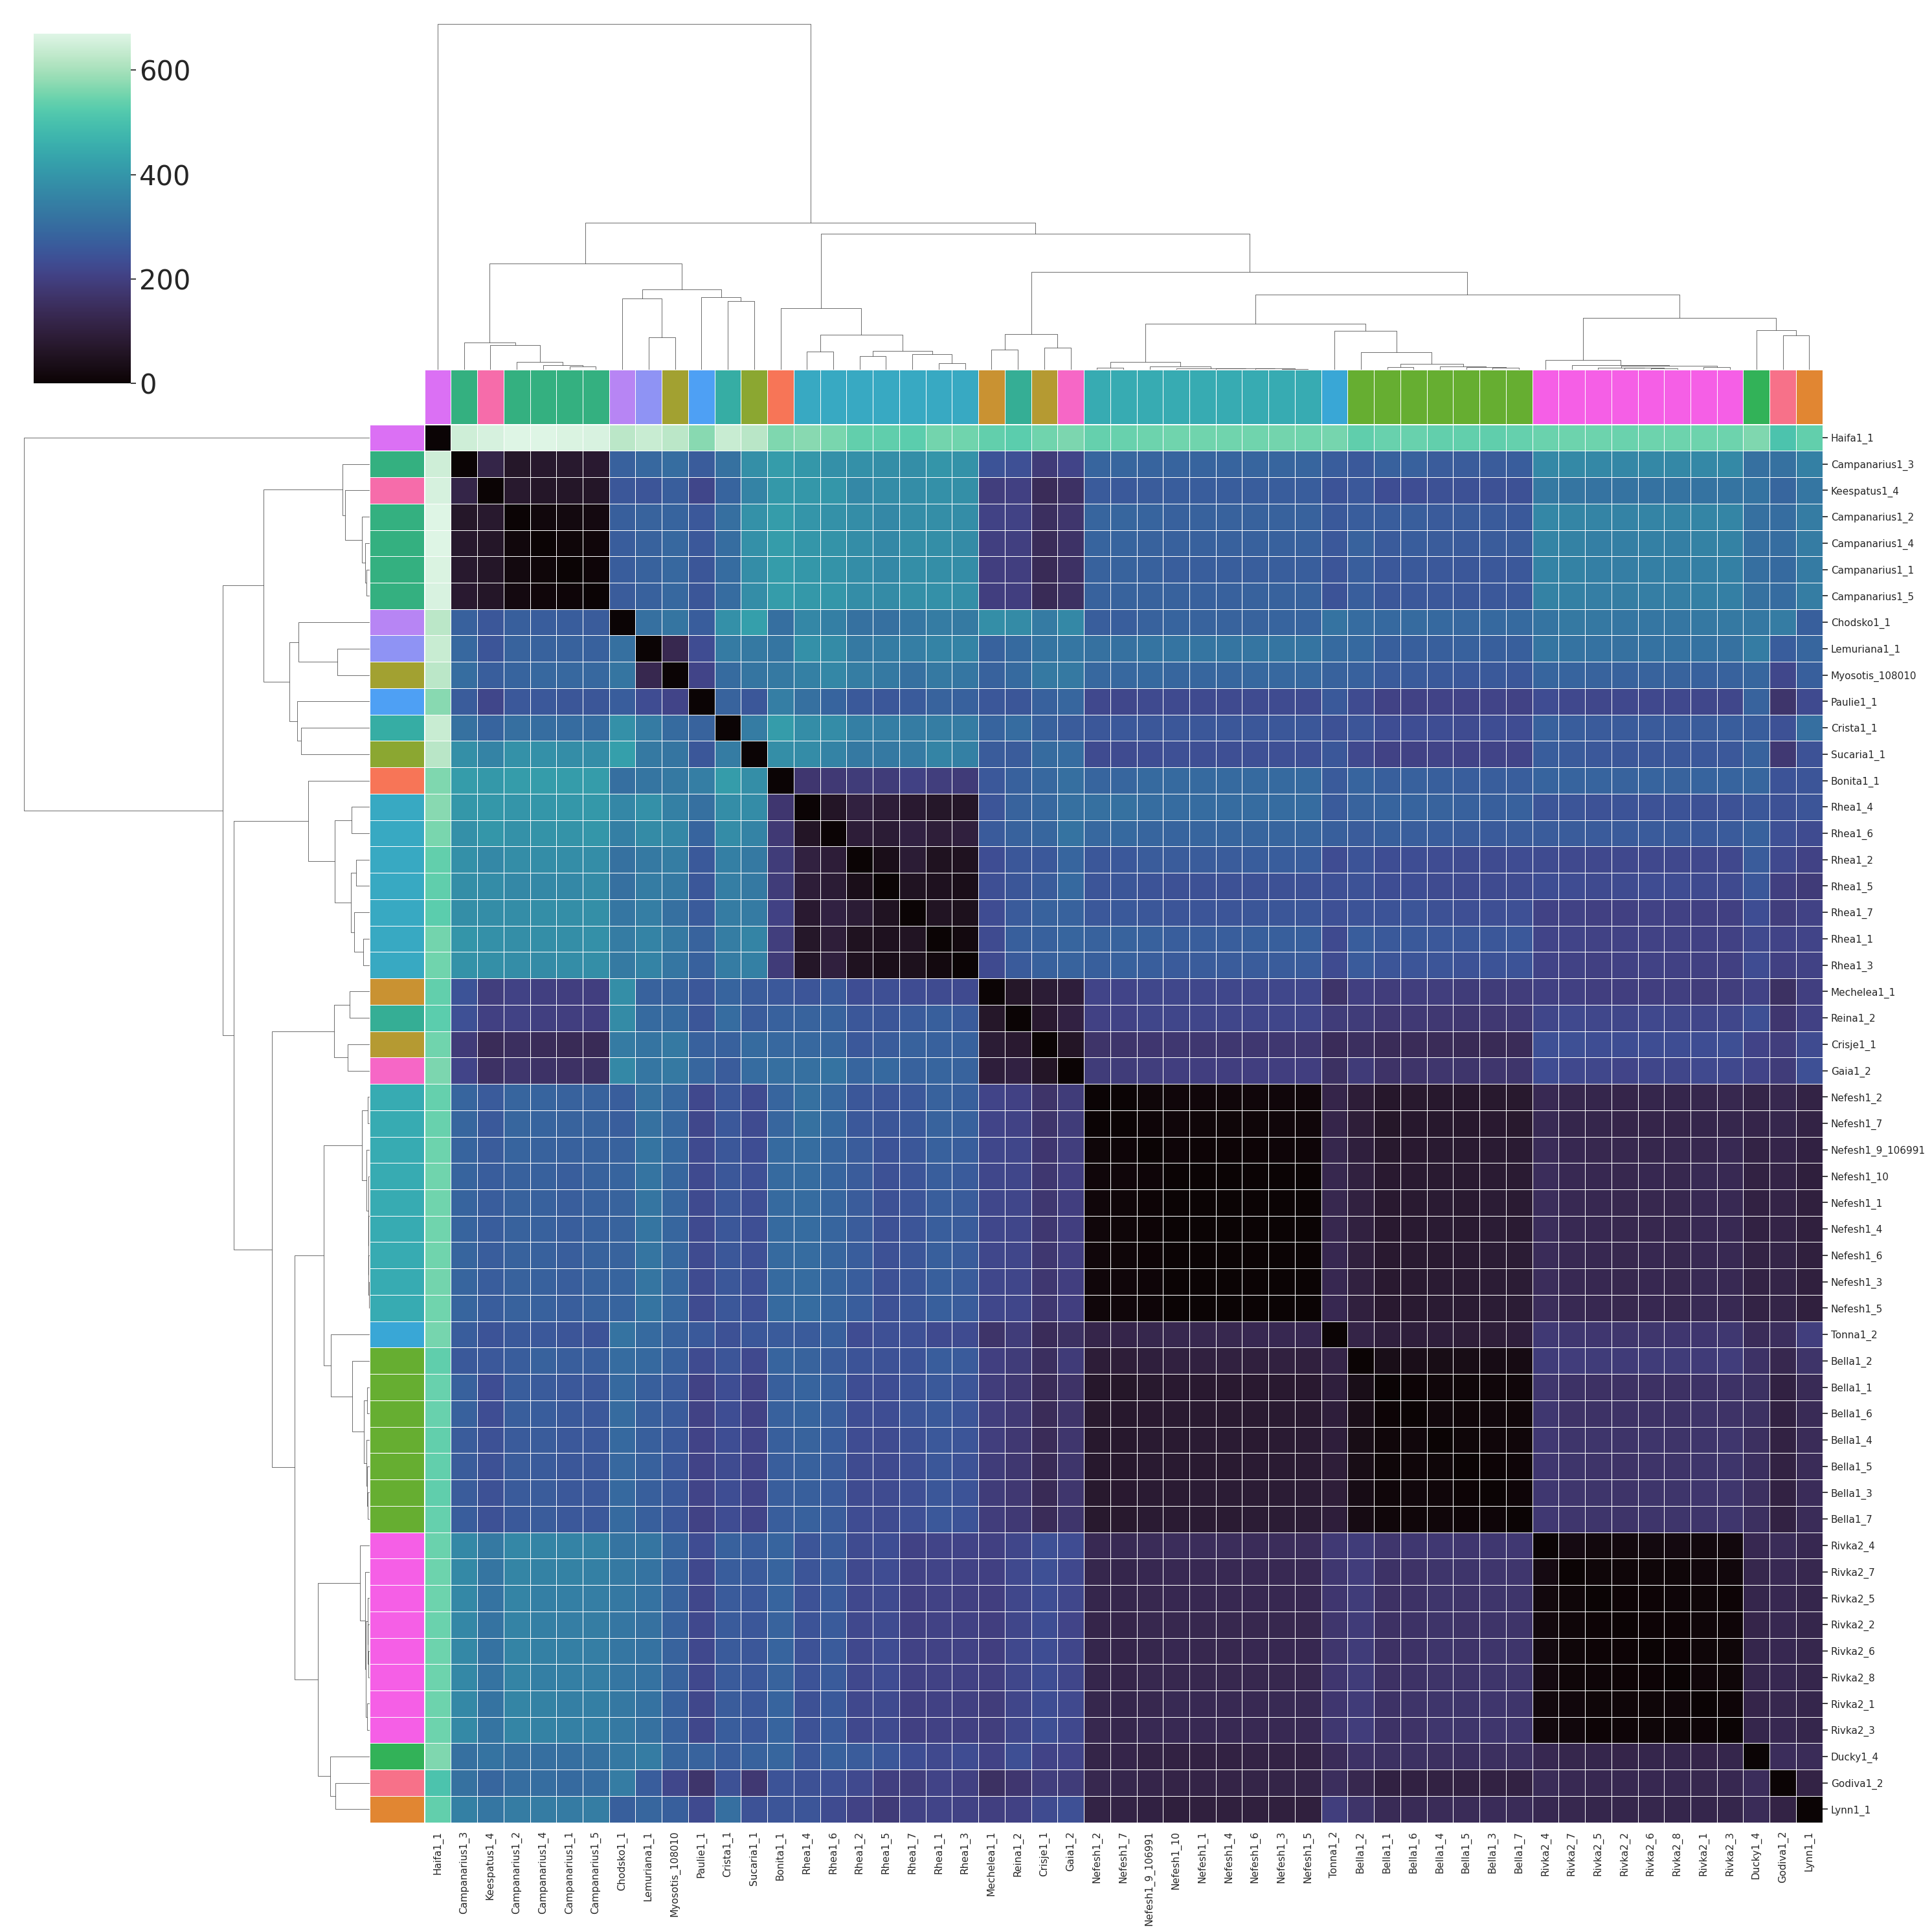

In [3]:
import pandas as pd
import seaborn as sns

dist_matrix = pd.read_csv(f"../results/pangenome_results/stringent/test_phandago/total_dist_matrix_filtered_mge.tsv", sep='\t', index_col="snp-dists 0.8.2")
dist_matrix.index.name = ""

sns.set_theme(style="whitegrid")

# make color labels for the individuals
sample_names = dist_matrix.index
unique_groups = set([name.split('_')[0] for name in sample_names])
palette = sns.color_palette("husl", len(unique_groups))
group_colors = {group: palette[i] for i, group in enumerate(unique_groups)}
row_colors = sample_names.map(lambda x: group_colors[x.split('_')[0]])
col_colors = row_colors.copy()

clustermap = sns.clustermap(dist_matrix, cmap="mako", figsize=(30,30),row_colors=row_colors, col_colors=col_colors, linewidths=.5)
colorbar = clustermap.cax
colorbar.tick_params(labelsize=30)
clustermap.savefig(f"../results/pangenome_results/stringent/test_phandago/total_clustermap_mge.png")

## This was used to filter the binary presence absence multiple sequence alignment

In [1]:
import pandas as pd
from Bio import SeqIO

# Load the merged gene data
merged_gene_data = pd.read_excel("merged_gene_data_func_filtered_mge.xlsx")

# Define functional groups to exclude
exclude_groups = ['Hypothetical protein', 'Function unknown']

# Create a mask to filter out these functional categories
mask = ~merged_gene_data['functional_category'].isin(exclude_groups)

# Filter the merged_gene_data to only include the rows you want
filtered_gene_data = merged_gene_data[mask]

# Get the indices of the genes to keep (since merged_gene_data is ordered the same as the alignment)
indices_to_keep = filtered_gene_data.index.tolist()
print(len(indices_to_keep))

# Load the binary gene presence/absence FASTA file
input_fasta = "../results/pangenome_results/stringent/binary_presence_absence.fasta"
output_fasta = "../results/pangenome_results/stringent/filtered_binary_presence_absence_mge.fasta"

# Use SeqIO to read the FASTA and write only the sequences at the indices to keep
with open(output_fasta, "w") as output_handle:
    for idx, record in enumerate(SeqIO.parse(input_fasta, "fasta")):
        record.seq = "".join([record.seq[i] for i in indices_to_keep])
        # record.seq = record.seq[indices_to_keep]
        SeqIO.write(record, output_handle, "fasta")

print(f"Filtered alignment written to {output_fasta}")


2270
Filtered alignment written to ../results/pangenome_results/stringent/filtered_binary_presence_absence_mge.fasta


/home/freekdek/miniconda3/envs/test_snp/lib/python3.12/site-packages/Bio/SeqRecord.py:354: BiopythonDeprecationWarning: Using a string as the sequence is deprecated and will raise a TypeError in future. It has been converted to a Seq object.
  warnings.warn(


# Gene comparison
Filter per individual, pairwise comparison of genes that differ, investigate genes that differ (look at function and location of genes, are the genes that differ close to eachother, surrounded by transposases?)

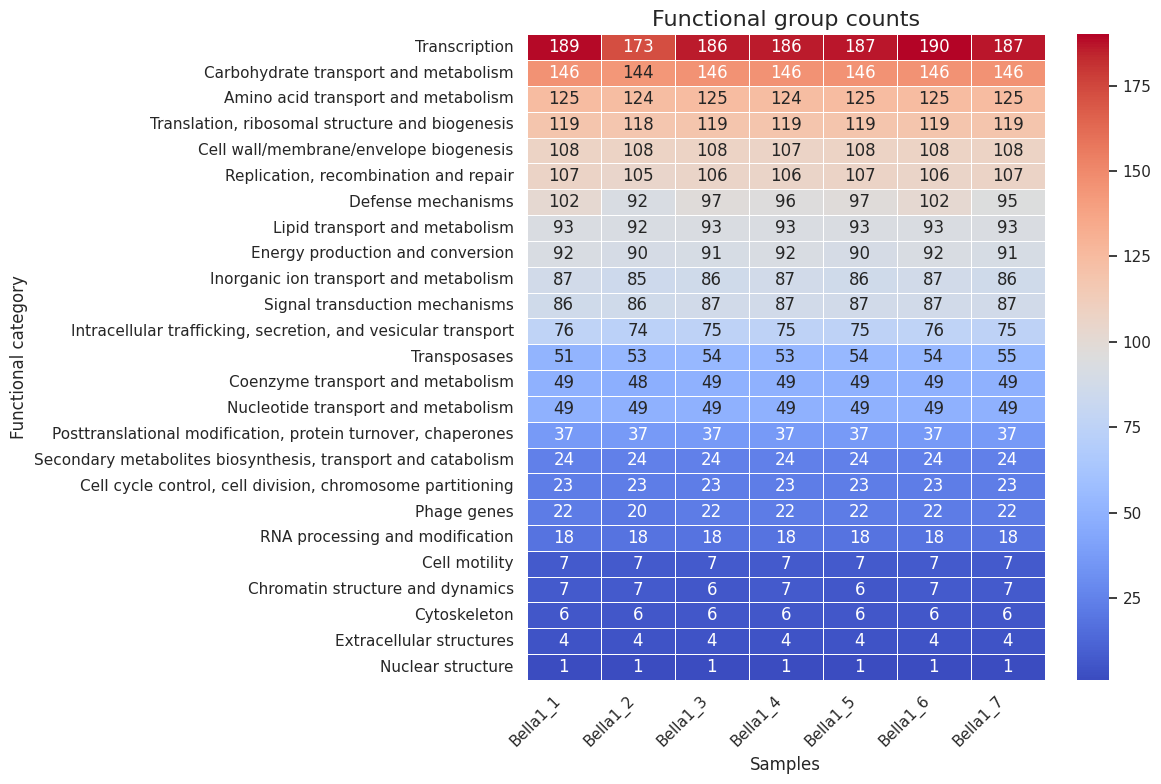

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# intra_individuals = ["Bella","Campanarius", "Nefesh", "Rhea", "Rivka"]
intra_individuals = ["Bella"]
merged_gene_data = pd.read_excel("merged_gene_data_func_filtered_mge.xlsx")
sample_columns = merged_gene_data.columns[merged_gene_data.columns.get_loc('Bella1_1'):merged_gene_data.columns.get_loc('Tonna1_2') + 1]

# Group by functional category and sum the number of genes across samples ['functional_category', 'gene_type']
functional_group_totals = merged_gene_data.groupby('functional_category')[sample_columns].count()

sns.set_theme(style="whitegrid")

for indv in intra_individuals:
    plt.figure(figsize=(12, 8))
    sample_df = functional_group_totals.filter(regex=f"(?i){indv}*")
    sample_df_sorted = sample_df.sort_values(by=sample_df.columns[0], ascending=False)
    sns.heatmap(sample_df_sorted, cmap="coolwarm", annot=True, fmt=".0f", linewidths=.5)
    plt.title("Functional group counts", fontsize=16)
    plt.xlabel("Samples", fontsize=12)
    plt.ylabel("Functional category", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0, ha='right')
    plt.tight_layout()

In [89]:
bella_list = ["Bella1_1", "Bella1_2", "Bella1_3", "Bella1_4", "Bella1_5", "Bella1_6", "Bella1_7"]
func_groups = merged_gene_data.functional_category.unique()
sample_columns = merged_gene_data.columns[merged_gene_data.columns.get_loc('Bonita1_1'):merged_gene_data.columns.get_loc('Tonna1_2') + 1].tolist()

# find the specific genes per individual
bella_df = merged_gene_data.drop(labels=sample_columns, axis=1)
print("All pangenome genes:", bella_df.shape[0])

bella_df = bella_df[~bella_df[bella_list].isna().all(axis=1)] # filter genes that are not in any of the bella samples
print("All Bella genes:", bella_df.shape[0])

bella_df = bella_df[bella_df[bella_list].isna().any(axis=1)]
print("Genes that differ:", bella_df.shape[0])

bella_df.to_excel("bella_df.xlsx")

for func_group in func_groups:
    func_df = bella_df[bella_df["functional_category"] == func_group]
    print(f"{func_group}:", func_df.shape[0])
    print(func_df["gene_description"])

All pangenome genes: 2270
All Bella genes: 1637
Genes that differ: 60
Carbohydrate transport and metabolism: 2
1252                        PTS sugar transporter
1424    ABC transporter substrate-binding protein
Name: gene_description, dtype: object
Transcription: 18
1344     DNA-binding helix-turn-helix protein
1370                         Helix-turn-helix
1385                       containing protein
1386                               AAA domain
1389                              DNA-binding
1394                         Helix-turn-helix
1400     XRE family transcriptional regulator
1436                        Acetyltransferase
1460     DNA-binding helix-turn-helix protein
1488     XRE family transcriptional regulator
1501    LysR family transcriptional regulator
1561                      DNA-binding protein
1569                Transcriptional regulator
1584     DNA-binding helix-turn-helix protein
1607    MarR family transcriptional regulator
1611    LysR family transcriptional regulat

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# merged_gene_data_func_filtered_mge.xlsx
merged_gene_data = pd.read_excel("../results/pangenome_results/intra_individual/pandavis/COG_matched_gene_families_func_only.xlsx")
func_groups = merged_gene_data.functional_category.unique()
out_dir = "../results/pangenome_results/intra_individual/pandavis/"

intra_individuals = ["Bella","Campanarius", "Nefesh", "Rhea", "Rivka"]
bella_list = ["Bella1_1", "Bella1_2", "Bella1_3", "Bella1_4", "Bella1_5", "Bella1_6", "Bella1_7"]
campanarius_list = ["Campanarius1_1", "Campanarius1_2", "Campanarius1_3", "Campanarius1_4", "Campanarius1_5"]
nefesh_list = ["Nefesh1_1", "Nefesh1_2", "Nefesh1_3", "Nefesh1_4", "Nefesh1_5", "Nefesh1_6", "Nefesh1_7", "Nefesh1_9_106991", "Nefesh1_10"]
rhea_list = ["Rhea1_1", "Rhea1_2", "Rhea1_3", "Rhea1_4", "Rhea1_5", "Rhea1_6", "Rhea1_7"]
rivka_list = ["Rivka2_1", "Rivka2_2", "Rivka2_3", "Rivka2_4", "Rivka2_5", "Rivka2_6", "Rivka2_7"]

diff_gene_count = []

def find_genes(indv, indv_list):
    # find the specific genes per individual
    print(f"\nSearching for variable genes in {indv} strains")
    
    df_indv = merged_gene_data[~merged_gene_data[indv_list].isna().all(axis=1)] # filter genes that are not in any of the bella samples
    print("All {indv} genes:", df_indv.shape[0])
    
    df_indv = df_indv[df_indv[indv_list].isna().any(axis=1)]
    print("Genes that differ:", df_indv.shape[0])
    
    for func_group in func_groups:
        func_df = df_indv[df_indv["functional_category"] == func_group]
        print(f"\n{func_group}:", func_df.shape[0])
        print(func_df["consensus_product"])
    print("\n\n")

    diff_gene_count.append(df_indv.shape[0])
    return df_indv

# for indv in individuals:
print("All pangenome genes:", merged_gene_data.shape[0])
df_bella = find_genes("Bella", bella_list)
df_bella.to_excel(f"{out_dir}bella_df.xlsx")
df_campanarius = find_genes("Campanarius", campanarius_list)
df_campanarius.to_excel(f"{out_dir}campanarius_df.xlsx")
df_nefesh = find_genes("Nefesh", nefesh_list)
df_nefesh.to_excel(f"{out_dir}nefesh_df.xlsx")
df_rhea = find_genes("Rhea", rhea_list)
df_rhea.to_excel(f"{out_dir}rhea_df.xlsx")
df_rivka = find_genes("Rivka", rivka_list)
df_rivka.to_excel(f"{out_dir}rivka_df.xlsx")

for i, indv in enumerate(intra_individuals): print(f"{indv}: {diff_gene_count[i]}")

All pangenome genes: 2270

Searching for variable genes in Bella strains
All {indv} genes: 1637
Genes that differ: 60

Carbohydrate transport and metabolism: 2
1252    Helix-turn-helix domain-containing protein
1424     ABC transporter substrate-binding protein
Name: consensus_product, dtype: object

Transcription: 18
1344                 DNA-binding helix-turn-helix protein
1370         Bacteriocin leader domain-containing protein
1385           Helix-turn-helix transcriptional regulator
1386             Transcriptional regulator%2C DeoR family
1389    HlyD family efflux transporter periplasmic ada...
1394                  ABC transporter%2C permease protein
1400                 XRE family transcriptional regulator
1436                                    Acetyltransferase
1460                 DNA-binding helix-turn-helix protein
1488                 XRE family transcriptional regulator
1501                LysR family transcriptional regulator
1561                                  DNA-

In [2]:
comparison_column = "allele_name"

def shared_genes(comp_col):
    df_shared = df_rhea[(df_rhea[comp_col].isin(df_bella[comp_col])) & 
    (df_rhea[comp_col].isin(df_campanarius[comp_col])) & 
    (df_rhea[comp_col].isin(df_nefesh[comp_col])) &
    (df_rhea[comp_col].isin(df_rivka[comp_col]))]
    print(df_shared.shape)
    return df_shared

print(df_rhea.shape)
df_shared = shared_genes(comparison_column)

(171, 79)
(2, 79)


In [3]:
df_shared_BNR = df_shared = df_bella[(df_bella[comparison_column].isin(df_nefesh[comparison_column])) &
(df_bella[comparison_column].isin(df_rivka[comparison_column]))]
print(df_shared_BNR.shape)

(7, 79)


In [4]:
df_shared_BNR

,allele_name,gene_family,consensus_gene_name,consensus_product,threshold,alleles_at_maximum_threshold,number_genomes,average_dose,min_dose,max_dose,...,Rivka2_5,Rivka2_6,Rivka2_7,Rivka2_8,Sucaria1_1,Tonna1_2,gene_type,gene_description,functional_category,count
1411,g00960_3_00003,g00960_3,tnp,IS256 family transposase,80,21,46,2.17,1,4,...,Rivka2_5_01428,NaN,NaN,Rivka2_8_01420,NaN,(Tonna1_2_00813:Tonna1_2_00814);Tonna1_2_00570...,shell,transposase,Transposases,NaN
1511,g01890_2_00011,g01890_2,NaN,IS3 family transposase,98,1,38,1.00,1,1,...,NaN,NaN,Rivka2_7_00935,NaN,Sucaria1_1_02179,Tonna1_2_01255,shell,transposase,Transposases,NaN
1526,g01080_2_00001,g01080_2,NaN,Transposase,60,3,35,1.03,1,2,...,Rivka2_5_00968,Rivka2_6_00983,Rivka2_7_00892,Rivka2_8_00966,Sucaria1_1_01501,Tonna1_2_01025,shell,transposase,Transposases,2994.0
1527,g01080_1_00012,g01080_1,NaN,Transposase IS4-like domain-containing protein,95,2,35,1.00,1,1,...,Rivka2_5_00969,Rivka2_6_00982,Rivka2_7_00891,Rivka2_8_00965,Sucaria1_1_01502,Tonna1_2_01026,shell,transposase,Transposases,NaN
1631,g03076_00006,g03076,NaN,SagB-type dehydrogenase domain protein,98,1,27,1.00,1,1,...,Rivka2_5_02127,Rivka2_6_02117,Rivka2_7_02112,Rivka2_8_02114,Sucaria1_1_02053,NaN,shell,SagB-type dehydrogenase domain protein,Energy production and conversion,2.0
1640,g01530_00006,g01530,NaN,GAF domain-containing protein,98,1,26,1.00,1,1,...,NaN,NaN,Rivka2_7_02192,NaN,NaN,Tonna1_2_01842,shell,GAF domain-containing protein,Signal transduction mechanisms,25.0
1690,g01312_00006,g01312,NaN,ABC-2 type transporter,98,1,19,1.00,1,1,...,Rivka2_5_02125,Rivka2_6_02115,Rivka2_7_02110,Rivka2_8_02112,NaN,NaN,shell,ABC-2 type transporter,Defense mechanisms,645.0


In [5]:
df_all_func = pd.DataFrame()
intra_individuals = ["Bella", "Campanarius", "Nefesh", "Rhea", "Rivka"]

# Iterate over each individual's dataframe and add counts
for i, df in enumerate([df_bella, df_campanarius, df_nefesh, df_rhea, df_rivka]):
    # Count the occurrences of each functional category, transpose, and assign individual name
    df_count = df.groupby("functional_category").size().to_frame().T
    df_count.index = [intra_individuals[i]]  # set the row index as the individual name
    
    # Concatenate the result with the main dataframe
    df_all_func = pd.concat([df_all_func, df_count], axis=0)

# Display the final concatenated dataframe
df_all_func = df_all_func.fillna(0)
display(df_all_func)


functional_category,Amino acid transport and metabolism,Carbohydrate transport and metabolism,Cell wall/membrane/envelope biogenesis,Chromatin structure and dynamics,Coenzyme transport and metabolism,Defense mechanisms,Energy production and conversion,Inorganic ion transport and metabolism,"Intracellular trafficking, secretion, and vesicular transport",Lipid transport and metabolism,...,"Replication, recombination and repair",Signal transduction mechanisms,Transcription,"Translation, ribosomal structure and biogenesis",Transposases,Nucleotide transport and metabolism,RNA processing and modification,"Posttranslational modification, protein turnover, chaperones","Cell cycle control, cell division, chromosome partitioning","Secondary metabolites biosynthesis, transport and catabolism"
Bella,2.0,2,3,1.0,1.0,11,2,2,2.0,1.0,...,2,1,18,1.0,9,0.0,0.0,0.0,0.0,0.0
Campanarius,2.0,4,4,2.0,1.0,7,1,4,3.0,3.0,...,7,5,13,0.0,10,1.0,2.0,0.0,0.0,0.0
Nefesh,0.0,1,2,1.0,0.0,7,1,2,0.0,0.0,...,2,2,2,2.0,9,0.0,0.0,2.0,0.0,0.0
Rhea,4.0,6,10,4.0,1.0,16,1,13,7.0,1.0,...,5,3,23,1.0,16,2.0,3.0,5.0,3.0,1.0
Rivka,3.0,2,3,0.0,0.0,3,1,1,1.0,0.0,...,1,1,6,0.0,9,0.0,0.0,1.0,0.0,0.0


### 

In [6]:
# Initialize an empty DataFrame to store results
df_all_func = pd.DataFrame()

# List of individual names to be used as identifiers
intra_individuals = ["Bella", "Campanarius", "Nefesh", "Rhea", "Rivka"]

# Iterate over each individual's dataframe and add counts
for i, df in enumerate([df_bella, df_campanarius, df_nefesh, df_rhea, df_rivka]):
    # Count the occurrences of each functional category
    df_count = df.groupby("functional_category").size()  # Group and count
    df_count.name = intra_individuals[i]  # Set the name for the individual count series
    
    # Add the count series as a new column to the main dataframe
    df_all_func = df_all_func.join(df_count, how='outer')  # Use outer join to include all functional categories

# Fill NaN values with 0
df_all_func = df_all_func.fillna(0)

# Display the final concatenated dataframe
display(df_all_func)


,Bella,Campanarius,Nefesh,Rhea,Rivka
functional_category,,,,,
Amino acid transport and metabolism,2.0,2.0,0.0,4,3.0
Carbohydrate transport and metabolism,2.0,4.0,1.0,6,2.0
"Cell cycle control, cell division, chromosome partitioning",0.0,0.0,0.0,3,0.0
Cell wall/membrane/envelope biogenesis,3.0,4.0,2.0,10,3.0
Chromatin structure and dynamics,1.0,2.0,1.0,4,0.0
Coenzyme transport and metabolism,1.0,1.0,0.0,1,0.0
Defense mechanisms,11.0,7.0,7.0,16,3.0
Energy production and conversion,2.0,1.0,1.0,1,1.0
Inorganic ion transport and metabolism,2.0,4.0,2.0,13,1.0


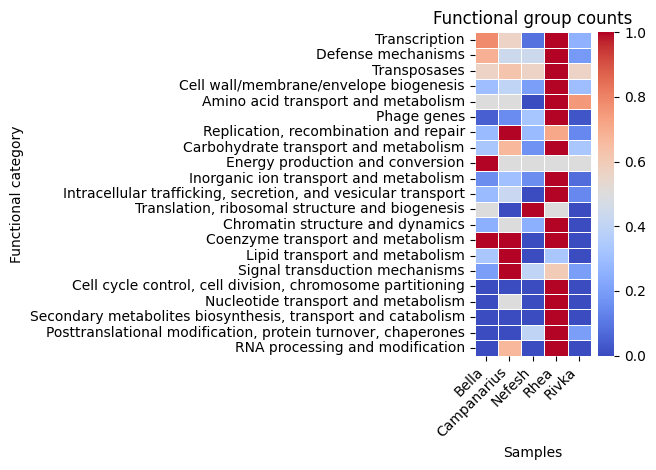

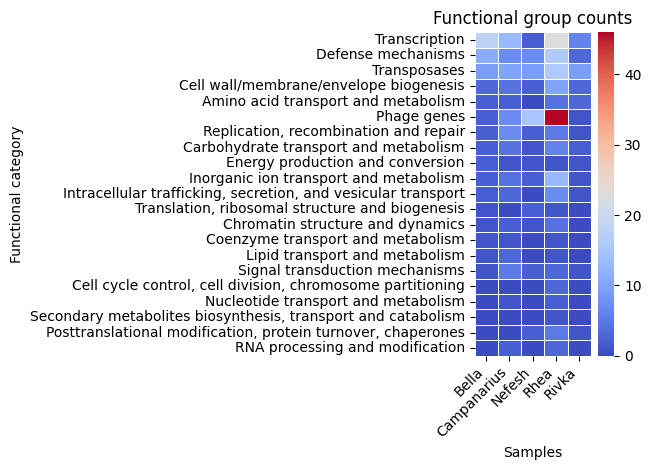

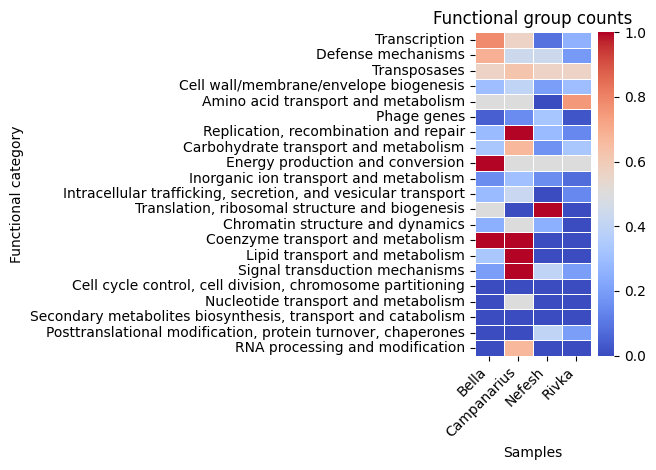

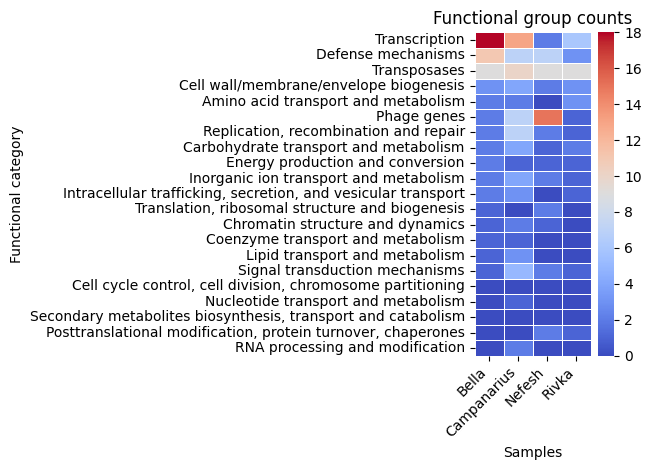

In [7]:
all_intra_individuals = ["Bella1_1", "Bella1_2", "Bella1_3", "Bella1_4", "Bella1_5", "Bella1_6", "Bella1_7", "Campanarius1_", "Campanarius1_2", 
                         "Campanarius1_3", "Campanarius1_4", "Campanarius1_5", "Nefesh1_1", "Nefesh1_2", "Nefesh1_3", "Nefesh1_4", "Nefesh1_5", 
                         "Nefesh1_6", "Nefesh1_7", "Nefesh1_9_106991", "Nefesh1_10", "Rhea1_1", "Rhea1_2", "Rhea1_2", "Rhea1_3", "Rhea1_4", "Rhea1_5",
                         "Rhea1_6", "Rhea1_7", "Rivka2_1", "Rivka2_2", "Rivka2_3", "Rivka2_4", "Rivka2_5", "Rivka2_6", "Rivka2_7"]

def concatenate_dataframes(presence_absence, functional_group_totals):
    # Transpose and set index names
    presence_absence_T = presence_absence.T
    presence_absence_T.index.name = 'Gene'
    functional_group_totals.index.name = 'Category'
    
    # Concatenate with alignment and fill missing values
    combined = pd.concat([presence_absence_T, functional_group_totals], axis=0).fillna(0)
    
    # Assign an overall index name, if needed
    combined.index.name = 'Functional Group'
    # combined = combined.sort_index(axis=1)
    return combined
    
df_all = pd.read_csv("../results/gene_cluster_genes/gene_fragments_result.tsv", sep="\t")
presence_absence = df_all.pivot_table(index="Sample", columns="Gene_fragment", 
                                  values="bitscore", aggfunc=lambda x: 1 if len(x) > 0 else 0, fill_value=0)
presence_absence = presence_absence.loc[presence_absence.index.isin([all_intra_individuals])]

def plot_heatmap(show_gt_fragments, normalize, no_rhea):
    if show_gt_fragments: sample_df = concatenate_dataframes(presence_absence, df_all_func)
    else: sample_df = df_all_func
    sample_df_sorted = sample_df.sort_values(by=sample_df.columns[0], ascending=False)
    if normalize: sample_df_n = sample_df_sorted.div(sample_df_sorted.max(axis=1), axis=0) 
    else: sample_df_n = sample_df_sorted
    if no_rhea: sample_df_n = sample_df_n[["Bella", "Campanarius", "Nefesh", "Rivka"]]
    sns.heatmap(sample_df_n, cmap="coolwarm", annot=False, fmt=".0f", linewidths=.5) # [["Bella", "Campanarius", "Nefesh", "Rivka"]]
    plt.title("Functional group counts") #, fontsize=16)
    plt.xlabel("Samples") #, fontsize=12)
    plt.ylabel("Functional category") #, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0, ha='right')
    plt.tight_layout()
    plt.show()
    return

plot_heatmap(show_gt_fragments=False, normalize=True, no_rhea=False)
plot_heatmap(show_gt_fragments=False, normalize=False, no_rhea=False)

plot_heatmap(show_gt_fragments=False, normalize=True, no_rhea=True)
plot_heatmap(show_gt_fragments=False, normalize=False, no_rhea=True)
# plt.savefig("../results/gene_cluster_genes/gene_fragments_func_groups.png")

In [8]:
sample_df_n

NameError: name 'sample_df_n' is not defined

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

merged_gene_data = pd.read_excel("../results/pangenome_results/intra_individual/pandavis/COG_matched_gene_families_func_only.xlsx")
bacfit_db = pd.read_csv("../data/bacfitbase_v1.tsv", sep="\t", low_memory=False)

# Calculate lengths for BacFITBase's translation column
bacfit_db['product_length'] = bacfit_db['translation'].str.len() * 3

def bacfit_merge(df_diff_genes, bacfit_db=bacfit_db):
    # Function to find the closest match for each product based on length
    def closest_length_match(row):
        # Filter BacFITBase for matching products
        matching_products = bacfit_db[bacfit_db['product'] == row['consensus_product']]
        
        # If matching products exist, find the one with the closest length
        if not matching_products.empty:
            closest_row = matching_products.iloc[(matching_products['product_length'] - row['average_length(bp)']).abs().argsort()[:1]]
            return closest_row
        
        # Return None if no matching products found
        return pd.DataFrame()

    # Apply function and concatenate closest matches
    closest_matches = pd.concat([closest_length_match(row) for idx, row in df_diff_genes.iterrows()])
    
    # Merge the original table with closest matches
    merged_bacfit = pd.merge(df_diff_genes, closest_matches, left_on='consensus_product', right_on='product', how='left')
    return merged_bacfit
    
bella_bacfit = bacfit_merge(df_bella)
campanarius_bacfit = bacfit_merge(df_campanarius)
nefesh_bacfit = bacfit_merge(df_nefesh)
rhea_bacfit = bacfit_merge(df_rhea)
rivka_bacfit = bacfit_merge(df_rivka)

print(bella_bacfit["fitness_z_score"])
print(campanarius_bacfit["fitness_z_score"])
print(nefesh_bacfit["fitness_z_score"])
print(rhea_bacfit["fitness_z_score"])
print(rivka_bacfit["fitness_z_score"])

0          NaN
1    -0.359526
2          NaN
3          NaN
4          NaN
        ...   
63         NaN
64    1.231295
65    0.407334
66         NaN
67         NaN
Name: fitness_z_score, Length: 68, dtype: float64
0          NaN
1     0.671513
2    -0.177313
3     0.459613
4     0.423196
        ...   
81         NaN
82         NaN
83         NaN
84         NaN
85         NaN
Name: fitness_z_score, Length: 86, dtype: float64
0     0.271401
1          NaN
2     0.556169
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8     0.490393
9     0.490393
10         NaN
11   -1.010541
12    0.490393
13    0.490393
14   -0.027632
15   -0.773657
16   -0.027632
17         NaN
18         NaN
19    0.847481
20   -2.066313
21         NaN
22   -0.027632
23   -0.773657
24   -0.027632
25         NaN
26         NaN
27         NaN
28         NaN
29    0.096918
30         NaN
31         NaN
32         NaN
33         NaN
34   -0.207849
35         NaN
36         NaN
37   -0.043052


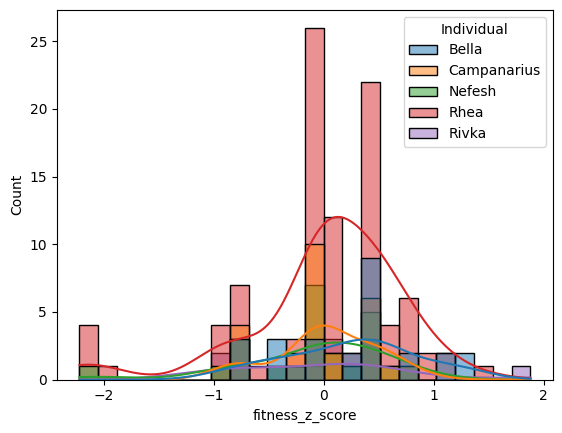

In [10]:
bacfit_dbs_list = [bella_bacfit[["fitness_z_score"]].copy(), campanarius_bacfit[["fitness_z_score"]].copy(),
                   nefesh_bacfit[["fitness_z_score"]].copy(), rhea_bacfit[["fitness_z_score"]].copy(),
                   rivka_bacfit[["fitness_z_score"]].copy()]
bacfit_dbs = pd.DataFrame()

for i, bacfit_db in enumerate(bacfit_dbs_list):
    bacfit_db["Individual"] = intra_individuals[i]
    bacfit_dbs = pd.concat([bacfit_dbs, bacfit_db], ignore_index=True)

sns.histplot(data=bacfit_dbs, x="fitness_z_score", hue="Individual", kde=True, multiple="layer")
plt.show()

In [11]:
bacfit_dbs

,fitness_z_score,Individual
0,NaN,Bella
1,-0.359526,Bella
2,NaN,Bella
3,NaN,Bella
4,NaN,Bella
...,...,...
465,NaN,Rivka
466,NaN,Rivka
467,NaN,Rivka
468,NaN,Rivka
